# AdventureWorks for Sales Analys
This analys we seek for AdventureWorks database to answer questions such as:
- Prodtc categories and their sales volume
- Sales trends in time
- sales performance for each region

We use SQL to get data and Python for visualisations. 



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text
from urllib.parse import quote_plus


server = '.\\SQLEXPRESS'
database = 'AdventureWorks2025'
driver = quote_plus("ODBC Driver 17 for SQL server")


connection_string = (
    f"mssql+pyodbc://@{server}/{database}"
    f"?driver={driver}&trusted_connection=yes&Encrypt=yes&TrustServerCertificate=yes"
)

engine = create_engine(connection_string)


try:
    with engine.connect():
        print("✅ Connection to SQL Server successful!")
except Exception as e:
    print("❌ Could not connect to the database.", e)

✅ Connection to SQL Server successful!


C:\Users\AliAkyel\AppData\Local\Temp\ipykernel_7920\3500691540.py:21: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  with engine.connect():


In [5]:
def query_df(sql: str):
    with engine.connect() as conn:
        return pd.read_sql(text(sql), conn)
    

**Din Jupyter Notebook ska följa denna struktur:**

## Introduktion (Markdown)
AdventureWorks Försäljningsanalys
Syfte: Beskriv kort vad analysen handlar om

## Setup (Code)
Imports
Connection
server = 'localhost'
database = 'AdventureWorks2022'
... connection string & engine

## Visualisation 1: Number of products per category
Business Question: How many products are in each category?

Data Requirements:

- Use tables: Production.ProductCategory, Production.ProductSubcategory, Production.Product
- Count unique products per category

Visualization Requirements:

- Type: Vertical Bar Chart (Bar)
- Title: "Number of Products per Category"

Insight Requirements:

- Explain which category has the most/least products.

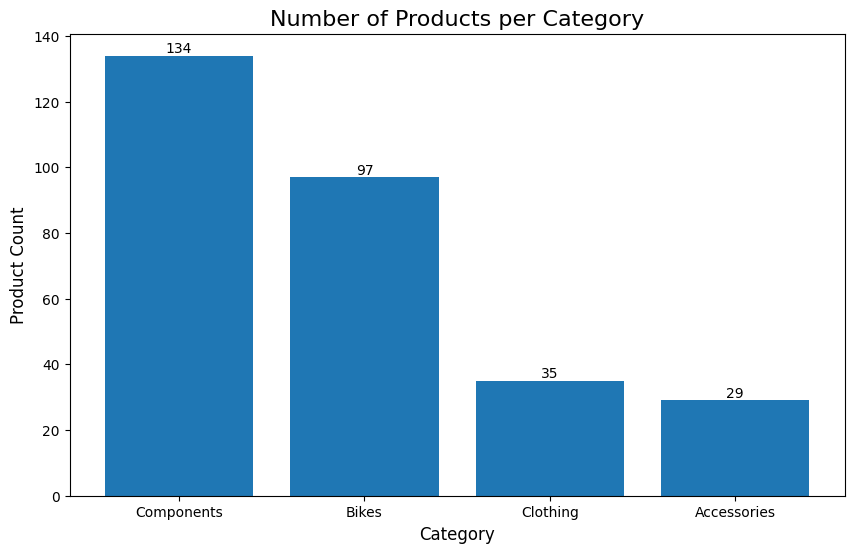

Data Overview:
  CategoryName  ProductCount
0   Components           134
1        Bikes            97
2     Clothing            35
3  Accessories            29


In [12]:
# --- QUESTION 1: Number of Products per Category ---

# 1. READ SQL FROM FILE
# Pointing to your specific folder "data" and file "query1.sql"
with open('../data/query1.sql', 'r') as file:
    query_q1 = file.read()

# 2. GET DATA
df_q1 = pd.read_sql(query_q1, engine)

# 3. VISUALIZE
plt.figure(figsize=(10, 6))
bars = plt.bar(df_q1['CategoryName'], df_q1['ProductCount'], color='#1f77b4')

plt.title('Number of Products per Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Product Count', fontsize=12)
plt.bar_label(bars)
plt.show()

# 4. INSIGHTS
print("Data Overview:")
print(df_q1)

**Add insight for the visualization above**

## Visualization 2: Sales by Product Category

Which product categories generate the most revenue?

Data Requirements:

- Use tables: Production.ProductCategory, Production.ProductSubcategory, Production.Product, Sales.SalesOrderDetail
- Sort from highest to lowest sales

Visualization Requirements:

- Type: Horizontal Bar Chart (barh)
- Title: "Total Sales by Product Category"
- Sort bars from highest to lowest (highest at the top)

Insight Requirements:

- Explain which category is the largest and smallest, with exact numbers.

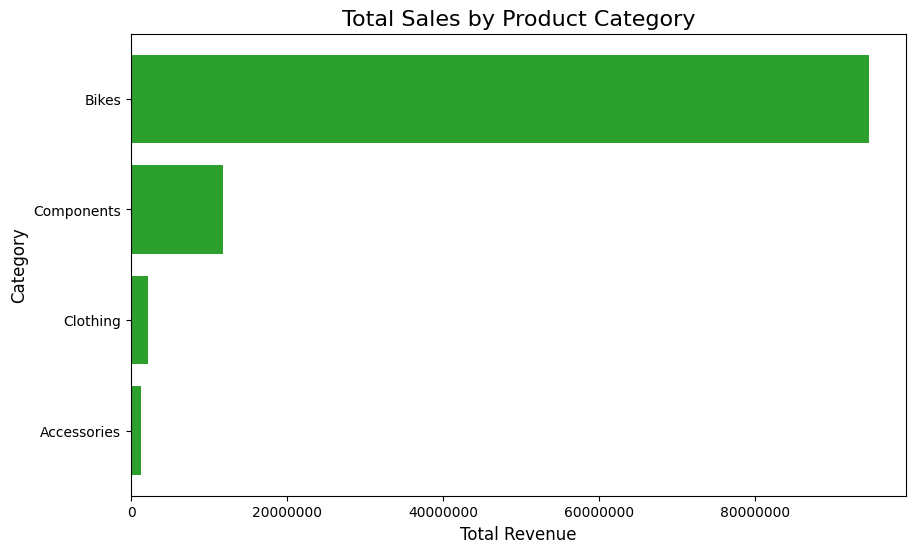

Data Overview:
  CategoryName    TotalSales
0        Bikes  9.465117e+07
1   Components  1.180259e+07
2     Clothing  2.120543e+06
3  Accessories  1.272073e+06


In [13]:
# --- QUESTION 2: Total Sales by Product Category ---

# 1. READ SQL FROM FILE
with open('../data/query2.sql', 'r') as file:
    query_q2 = file.read()

# 2. GET DATA
df_q2 = pd.read_sql(query_q2, engine)

# 3. VISUALIZE
plt.figure(figsize=(10, 6))

# Create Horizontal Bar Chart (barh)
# y = Categories, width = Sales
bars = plt.barh(df_q2['CategoryName'], df_q2['TotalSales'], color='#2ca02c')

# Formatting: Add Title and Labels
plt.title('Total Sales by Product Category', fontsize=16)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Category', fontsize=12)

# Important: Invert Y-axis so the highest value is at the top
plt.gca().invert_yaxis()

# Format the x-axis to look like currency (optional but professional)
# This prevents scientific notation (like 1e8)
plt.ticklabel_format(style='plain', axis='x')

plt.show()

# 4. INSIGHTS
print("Data Overview:")
print(df_q2)

**Add insight for the visualization 2 above**

## Visualization 3: Sales Trend Over Time

How have sales developed over time?

Data Requirements:

- Use tables: Sales.SalesOrderHeader
- Aggregate by month (at least 12 months of data)
- Sort chronologically (oldest first)

Visualization Requirements:

- Type: Line Plot
- Title: "Sales Trend Over Month"
- Show clear timeline on X-axis

Insight Requirements:

- Describe the trend - is it increasing, decreasing, is it seasonal? Mention the highest and lowest month.

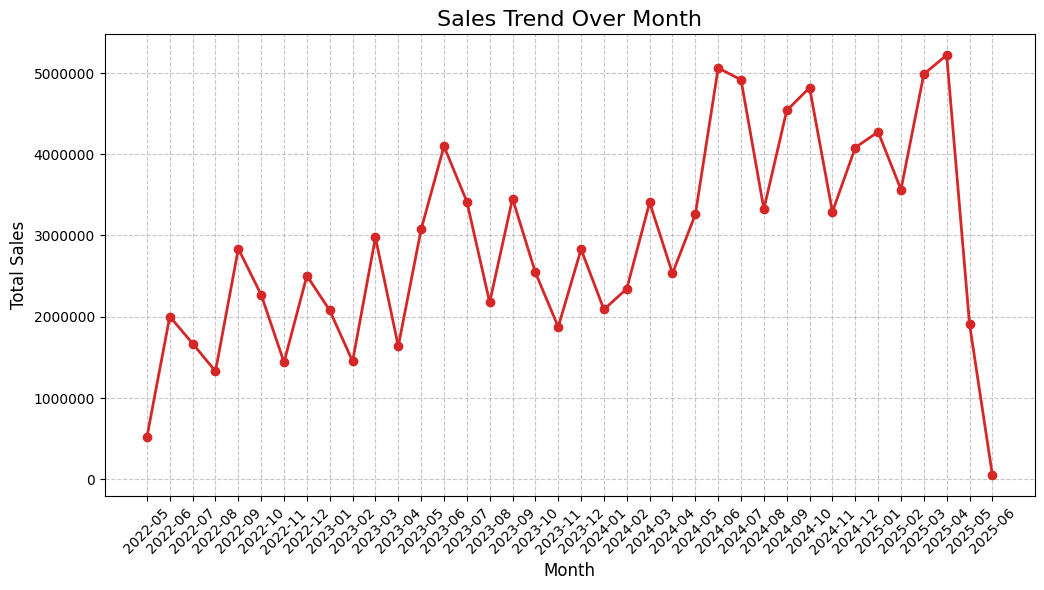

Data Overview (First 5 and Last 5 months):
  OrderMonth    TotalSales
0    2022-05  5.177374e+05
1    2022-06  2.001279e+06
2    2022-07  1.668510e+06
3    2022-08  1.326138e+06
4    2022-09  2.836410e+06
...
   OrderMonth    TotalSales
33    2025-02  3.565879e+06
34    2025-03  4.987902e+06
35    2025-04  5.222759e+06
36    2025-05  1.908059e+06
37    2025-06  4.749155e+04


In [14]:
# --- QUESTION 3: Sales Trend Over Time ---

# 1. READ SQL
with open('../data/query3.sql', 'r') as file:
    query_q3 = file.read()

# 2. GET DATA
df_q3 = pd.read_sql(query_q3, engine)

# 3. VISUALIZE
plt.figure(figsize=(12, 6))

# Line Plot
# marker='o' adds a dot for each month so you can see the data points clearly
plt.plot(df_q3['OrderMonth'], df_q3['TotalSales'], marker='o', color='#d62728', linewidth=2)

plt.title('Sales Trend Over Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Rotate x-axis labels so dates don't overlap
plt.xticks(rotation=45)

# Add a grid to make reading values easier
plt.grid(True, linestyle='--', alpha=0.7)

# Format y-axis to avoid scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.show()

# 4. INSIGHTS
print("Data Overview (First 5 and Last 5 months):")
print(df_q3.head())
print("...")
print(df_q3.tail())

**Analysis & Insights** for Vizualisation 3



## Visualization 4: Sales and Number of Orders per Year

What do total sales and number of orders look like per year?

Data Requirements:

- Use tables: Sales.SalesOrderHeader
- Show both total sales AND number of orders
- Group by year
- Sort chronologically

Visualization Requirements:

- Type: Grouped bar chart OR two separate bars per year
- Title: "Sales and Number of Orders per Year"

Insight Requirements:

- Compare the years - which year had the highest sales? Are both sales AND number of orders increasing, or just one?

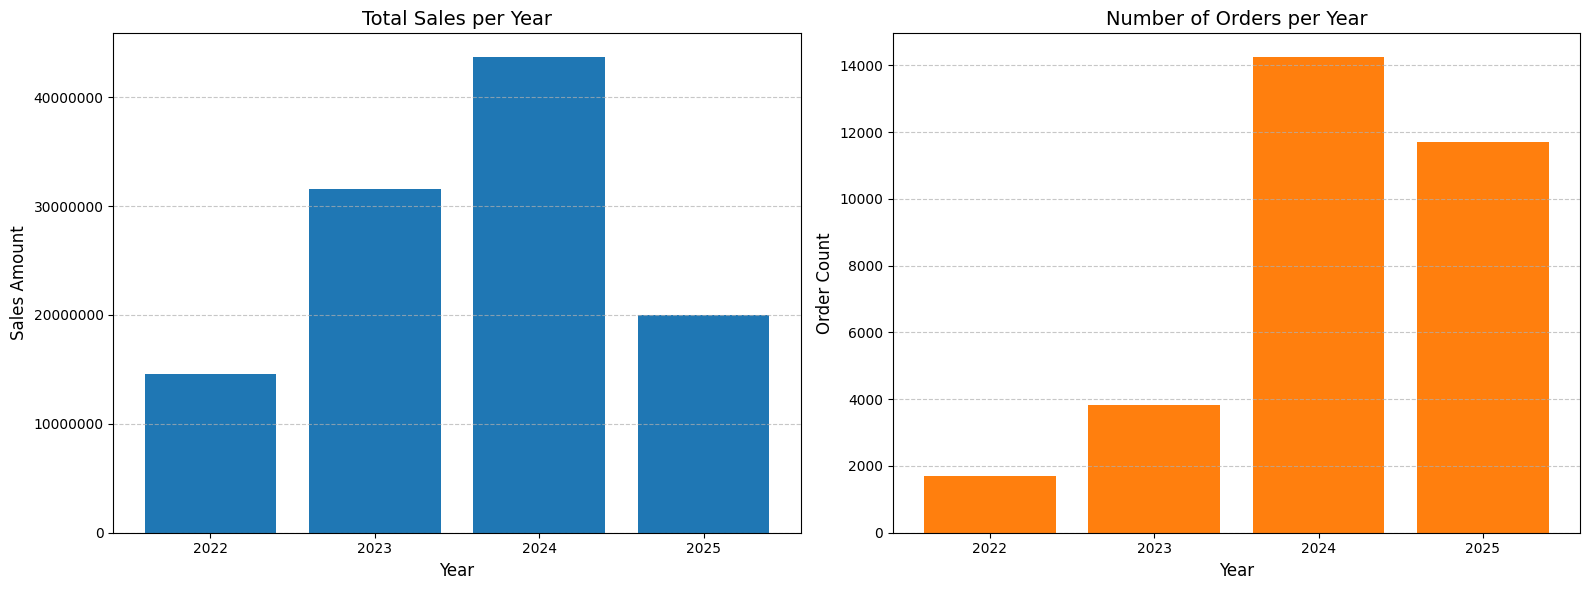

Data Overview:
   OrderYear    TotalSales  TotalOrders
0       2022  1.456105e+07         1692
1       2023  3.160492e+07         3830
2       2024  4.367189e+07        14244
3       2025  2.000852e+07        11699


In [15]:
# --- QUESTION 4: Sales vs. Orders per Year ---

# 1. READ SQL
with open('../data/query4.sql', 'r') as file:
    query_q4 = file.read()

# 2. GET DATA
df_q4 = pd.read_sql(query_q4, engine)

# 3. VISUALIZE (Using Subplots to handle different scales)
# fig is the container, ax1 and ax2 are the two separate charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# --- Chart 1: Total Sales (The Money) ---
ax1.bar(df_q4['OrderYear'].astype(str), df_q4['TotalSales'], color='#1f77b4')
ax1.set_title('Total Sales per Year', fontsize=14)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Sales Amount', fontsize=12)
ax1.ticklabel_format(style='plain', axis='y') # Remove scientific notation
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# --- Chart 2: Number of Orders (The Volume) ---
ax2.bar(df_q4['OrderYear'].astype(str), df_q4['TotalOrders'], color='#ff7f0e')
ax2.set_title('Number of Orders per Year', fontsize=14)
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Order Count', fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout so title doesn't overlap
plt.tight_layout()
plt.show()

# 4. INSIGHTS
print("Data Overview:")
print(df_q4)

**Add Analysis and Insights on Q4**

## Vis 5: Top 10 Products

Business Question: Which 10 products generate the most sales?

Data Requirements:

- Use tables: Production.Product, Sales.SalesOrderDetail
- Show only TOP 10 products
- Sort from highest to lowest sales

Visualization Requirements:

- Type: Horizontal Bar Chart (barh)
- Title: "Top 10 Products by Sales"
- Sort bars from highest to lowest (highest at the top)

Insight Requirements:

- Name the #1 product with exact sales value. Which category dominates the top 10?

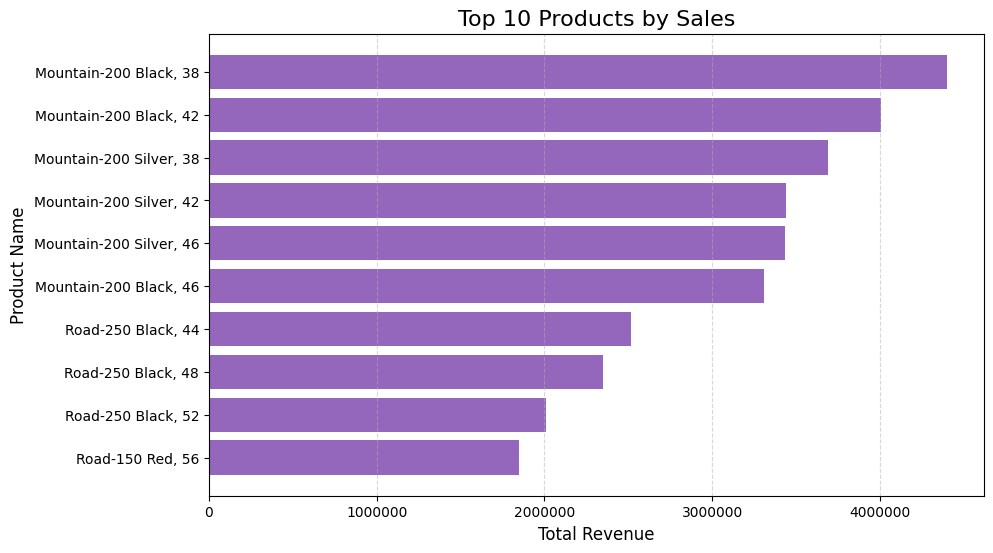

Top 10 List:
               ProductName    TotalSales
0   Mountain-200 Black, 38  4.400593e+06
1   Mountain-200 Black, 42  4.009495e+06
2  Mountain-200 Silver, 38  3.693678e+06
3  Mountain-200 Silver, 42  3.438479e+06
4  Mountain-200 Silver, 46  3.434257e+06
5   Mountain-200 Black, 46  3.309673e+06
6       Road-250 Black, 44  2.516857e+06
7       Road-250 Black, 48  2.347656e+06
8       Road-250 Black, 52  2.012448e+06
9         Road-150 Red, 56  1.847819e+06


In [16]:
# --- QUESTION 5: Top 10 Products by Sales ---

# 1. READ SQL
with open('../data/query5.sql', 'r') as file:
    query_q5 = file.read()

# 2. GET DATA
df_q5 = pd.read_sql(query_q5, engine)

# 3. VISUALIZE
plt.figure(figsize=(10, 6))

# Horizontal Bar Chart
bars = plt.barh(df_q5['ProductName'], df_q5['TotalSales'], color='#9467bd')

plt.title('Top 10 Products by Sales', fontsize=16)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Product Name', fontsize=12)

# Invert y-axis to have the highest sales at the top
plt.gca().invert_yaxis()

# Format x-axis to look like currency
plt.ticklabel_format(style='plain', axis='x')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

# 4. INSIGHTS
print("Top 10 List:")
print(df_q5)

**Add analysis and insights for question 5**


## Sales and Number of Customers by Region

Business Question: How do sales differ between different regions, and how many unique customers does each region have?

Data Requirements:

- Use tables: Sales.SalesTerritory, Sales.SalesOrderHeader, Sales.Customer
- Show total sales AND number of unique customers per region

Sort from highest to lowest sales

Visualization Requirements:

- Type: Grouped bar with two bars per region
- Title: "Sales and number of customers per region"
- One bar for sales, one bar for number of customers
- Sort regions by highest sales

Insight Requirements:

- Which region is the strongest/weakest? Compare: Does the region with the highest sales also have the most customers, or does it have fewer customers with higher order values? What does that mean?

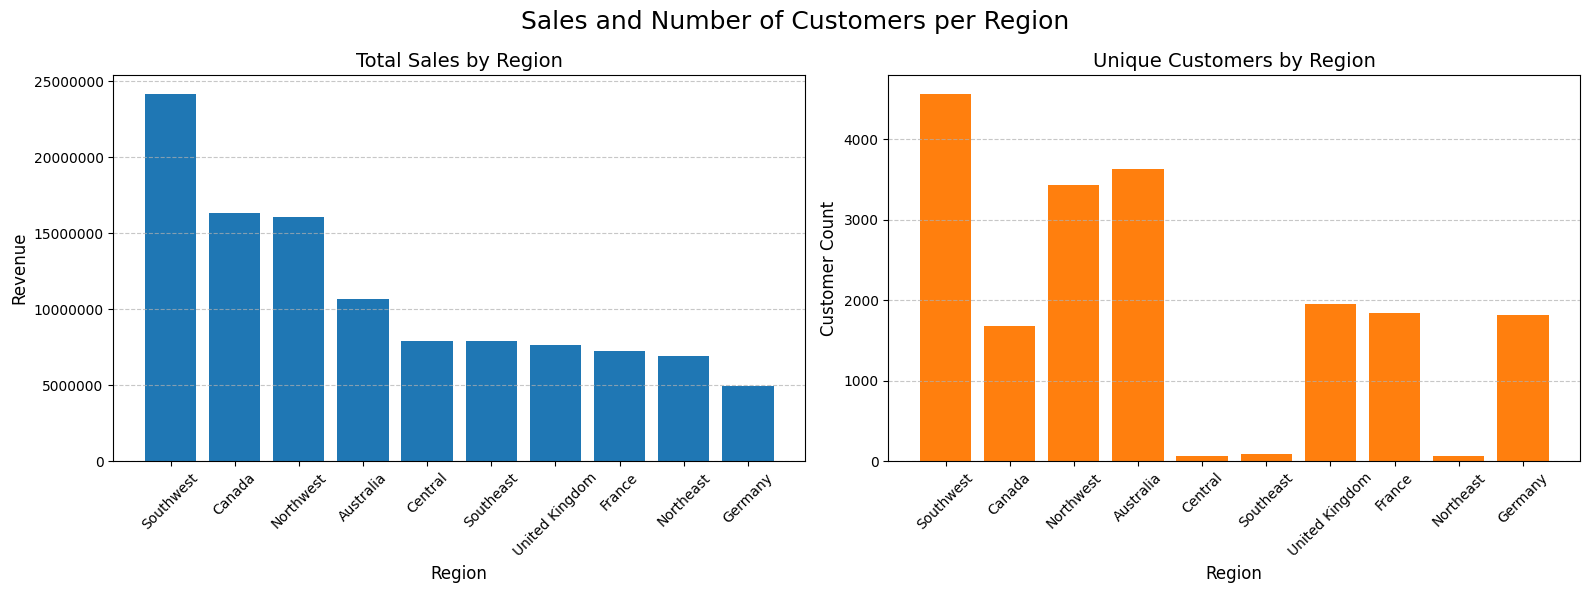

Regional Data:
       RegionName    TotalSales  UniqueCustomers
0       Southwest  2.418461e+07             4565
1          Canada  1.635577e+07             1677
2       Northwest  1.608494e+07             3428
3       Australia  1.065534e+07             3625
4         Central  7.909009e+06               69
5       Southeast  7.879655e+06               91
6  United Kingdom  7.670721e+06             1951
7          France  7.251556e+06             1844
8       Northeast  6.939374e+06               57
9         Germany  4.915408e+06             1812


In [17]:
# --- QUESTION 6: Sales & Customers by Region ---

# 1. READ SQL
with open('../data/query6.sql', 'r') as file:
    query_q6 = file.read()

# 2. GET DATA
df_q6 = pd.read_sql(query_q6, engine)

# 3. VISUALIZE (Subplots for different scales)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# --- Chart 1: Total Sales ---
ax1.bar(df_q6['RegionName'], df_q6['TotalSales'], color='#1f77b4')
ax1.set_title('Total Sales by Region', fontsize=14)
ax1.set_xlabel('Region', fontsize=12)
ax1.set_ylabel('Revenue', fontsize=12)
ax1.tick_params(axis='x', rotation=45) # Rotate labels for readability
ax1.ticklabel_format(style='plain', axis='y')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# --- Chart 2: Unique Customers ---
ax2.bar(df_q6['RegionName'], df_q6['UniqueCustomers'], color='#ff7f0e')
ax2.set_title('Unique Customers by Region', fontsize=14)
ax2.set_xlabel('Region', fontsize=12)
ax2.set_ylabel('Customer Count', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle('Sales and Number of Customers per Region', fontsize=18)
plt.tight_layout()
plt.show()

# 4. INSIGHTS
print("Regional Data:")
print(df_q6)

**add analysis for questin 6**


## Average Order Value by Region and Customer Type

Business Question: Which regions have the highest/lowest average order value, and does it differ between individual and corporate customers?

Data Requirements:

- Use tables: Sales.SalesTerritory, Sales.SalesOrderHeader, Sales.Customer, Sales.Store
- Calculate: Total Sales / Number of Orders per Region
- Split by Customer Type: Store (Company) vs. Individual (Private)
- Sort from highest to lowest average

Visualization Requirements:

- Type: Grouped Bar
- Title: "Average Order Value per Region and Customer Type"
- Two bars per region: one for Store, one for Individual
- Sort regions by highest average (total)

Insight Requirements:

- Compare Store vs. Individual - which group has higher order value? Does it differ between regions? What can explain the differences? Which region + customer type combination has the highest order value?